## Import Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [ ]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]
# since we have bias then 
x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print("shape of x is ", x.shape)
print("shape of y is ", y.shape)

shape of x is  (25, 4)
shape of y is  (25, 1)


### Main functions

In [ ]:
def initialization(x):
    costs, err_ls = [], []
    n = x.shape[1]
    theta, m, v = np.zeros((n, 1)), np.zeros((n, 1)), np.zeros((n, 1))
    return theta, costs, err_ls, m, v 

def h(x, theta):
    y_pred = x @ theta
    return y_pred
  
def J(y_pred, y):
    e = y_pred - y
    n = len(y_pred)
    loss = (1/(2* n))*(e.T @ e)[0][0]
    return loss
def calc_gradient(y_pred, y, x):
    e = y_pred - y
    n = len(y_pred)
    D_theta = x.T @ e * (1/n)
    return D_theta 

def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)

# Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.

In [ ]:
def Adam_FullBatch (x, y, alpha, max_it, beta1, beta2, epsilon):
    theta, costs, thetas, m, v= initialization(x)
    # m, v = np.zeros((x.shape[1], 1)), np.zeros((x.shape[1], 1))
    for i in range(max_it):
        #hypothisis
        y_pred = h(x, theta)
        thetas.append(theta)
        #calc cost
        loss = J(y_pred,y)
        costs.append(loss) 
        #update gradient
        D_theta = calc_gradient(y_pred, y, x)
        #update gradient
        m = beta1 * m + ((1 - beta1) * D_theta)
        v = beta2 * v + ((1 - beta2) * (D_theta ** 2))
        theta = theta - ((alpha * m) / np.sqrt(v + epsilon)) 
        if abs(loss - costs[i-1]) < 0.001 and i!=0:
            break
        elif np.linalg.norm(D_theta) < 0.001:
            break
    return costs, thetas



In [ ]:
costs, thetas= Adam_FullBatch (x, y, alpha = 0.01, max_it = 100, beta1 = 0.9, beta2 = 0.999 , epsilon = 1e-3)
y_pred = h(x, thetas[-1])
print("R2score =", r2_score(y, y_pred))


R2score = 0.9776541830114543


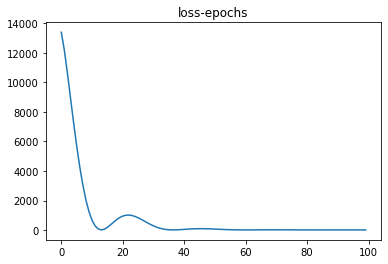

In [ ]:
plt.plot(costs)
plt.title("loss-epochs")
plt.show()

100 4


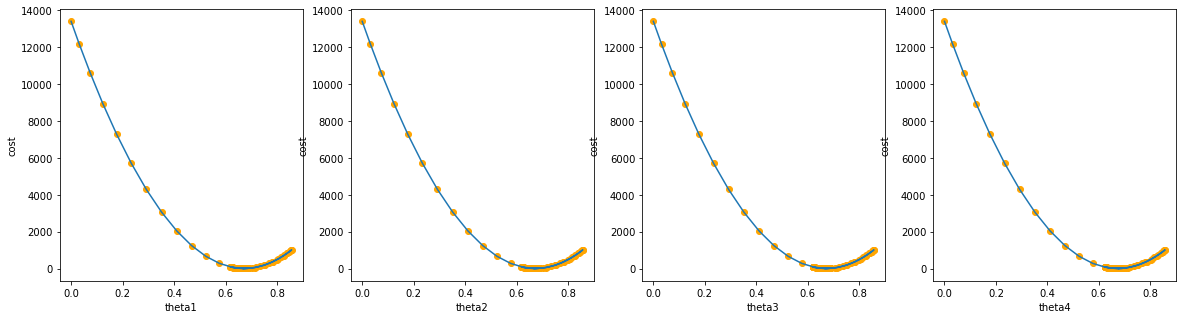

In [ ]:
thetaVSloss(thetas, costs)